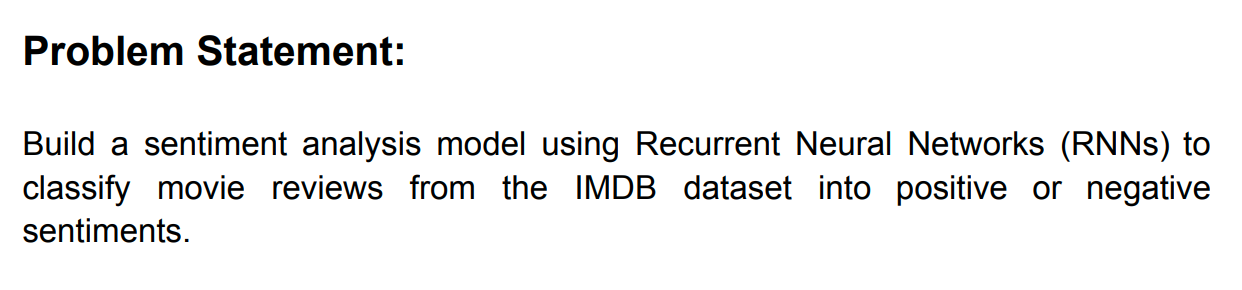

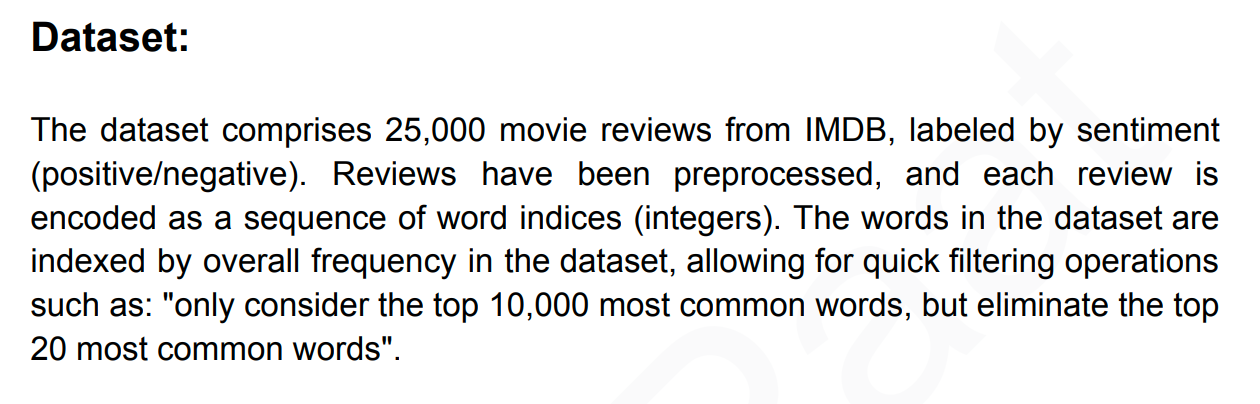

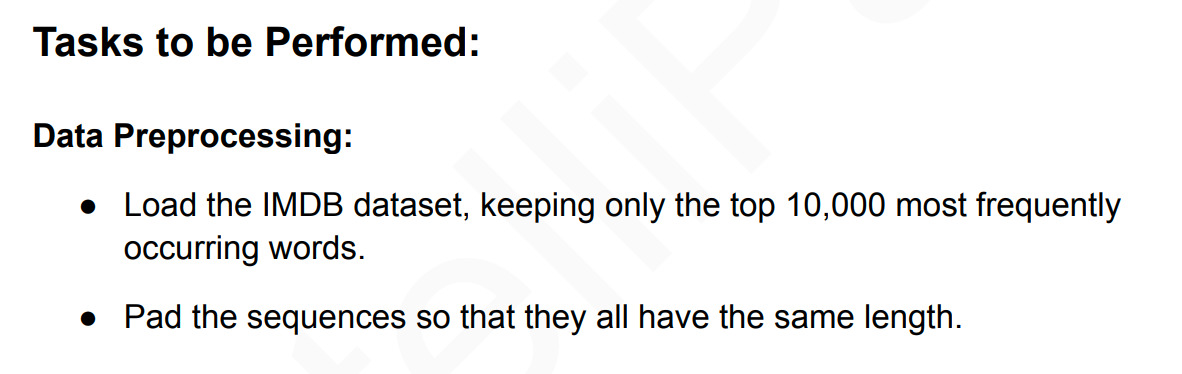

In [ ]:
from tensorflow import keras

In [ ]:
(X_train, y_train), (X_test, y_test)= keras.datasets.imdb.load_data(
    path= "imdb.npz",
    num_words= 10000,
    skip_top= 20,
    seed=0,
    max_len= 2000,
    start_char= 1,
    oov_char=2
)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
#longest sequence in reviews
print(max(len(seq) for seq in X_train))
print(max(len(seq) for seq in X_test))

2494
2315


In [ ]:
from tensorflow.keras.utils import pad_sequences

X_train_padded= pad_sequences(X_train, maxlen= 2000, padding= 'post', truncating= 'post')
X_test_padded= pad_sequences(X_test, maxlen= 2000, padding= 'post', truncating= 'post')

In [ ]:
print(X_train_padded.shape)
print(X_test_padded.shape)

(25000, 2000)
(25000, 2000)


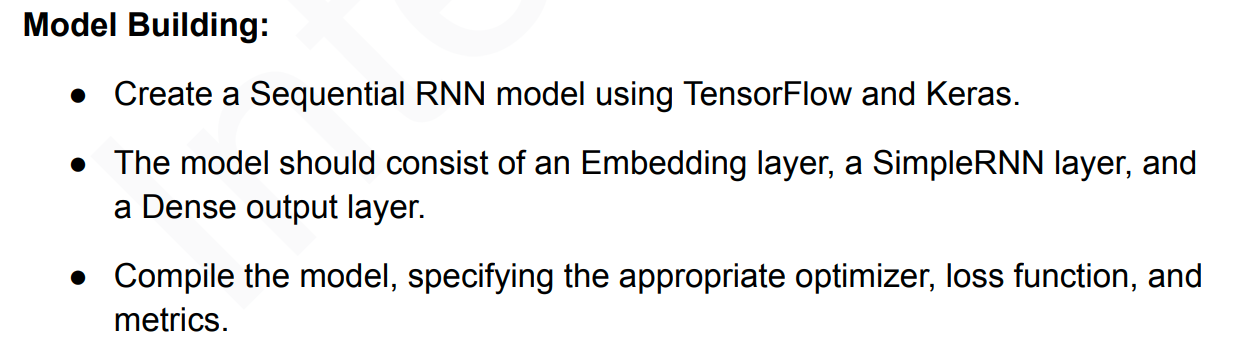

In [ ]:
vocab_len= 10000
review_length= 2000 #all the reviews have length 2000

#blank canvas
model= keras.models.Sequential()

#Embedding layer
model.add(keras.layers.Embedding(input_dim= 10000, output_dim= 128, input_length= 2000))

#RNN 1
model.add(keras.layers.SimpleRNN(64, return_sequences= True))

#RNN 2
model.add(keras.layers.SimpleRNN(32))

#Output Layer
model.add(keras.layers.Dense(1, activation='sigmoid'))


#build the model
model.build(input_shape= (None, review_length)) # Explicitly defining input shape

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 2000, 128)           │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 2000, 64)            │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,295,489 (4.94 MB)

 Trainable params: 1,295,489 (4.94 MB)

 Non-trainable params: 0 (0.00 B)

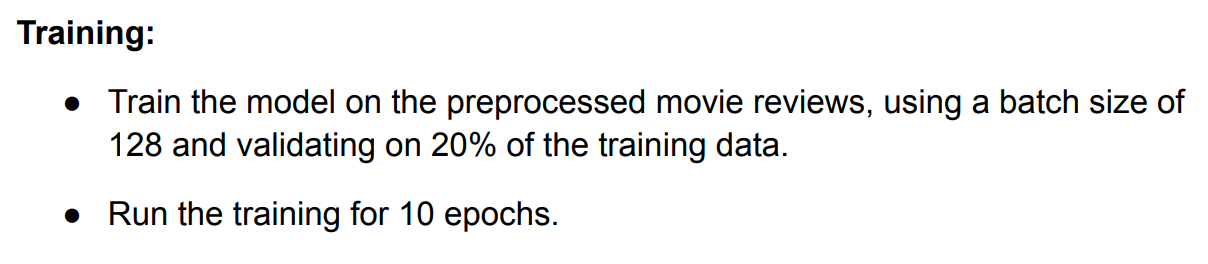

In [ ]:
#from tensorflow.keras.callbacks import EarlyStopping

#early_stop= EarlyStopping(
#    monitor= 'val_accuracy',
#    min_delta= 0.001,
#    patience= 6,
#    verbose=1,
#    baseline= None,
#    mode= 'auto',
#    restore_best_weights= True,
#    start_from_epoch= 7
#)

! pip install -q livelossplot

import livelossplot
plot_losses= livelossplot.PlotLossesKeras()

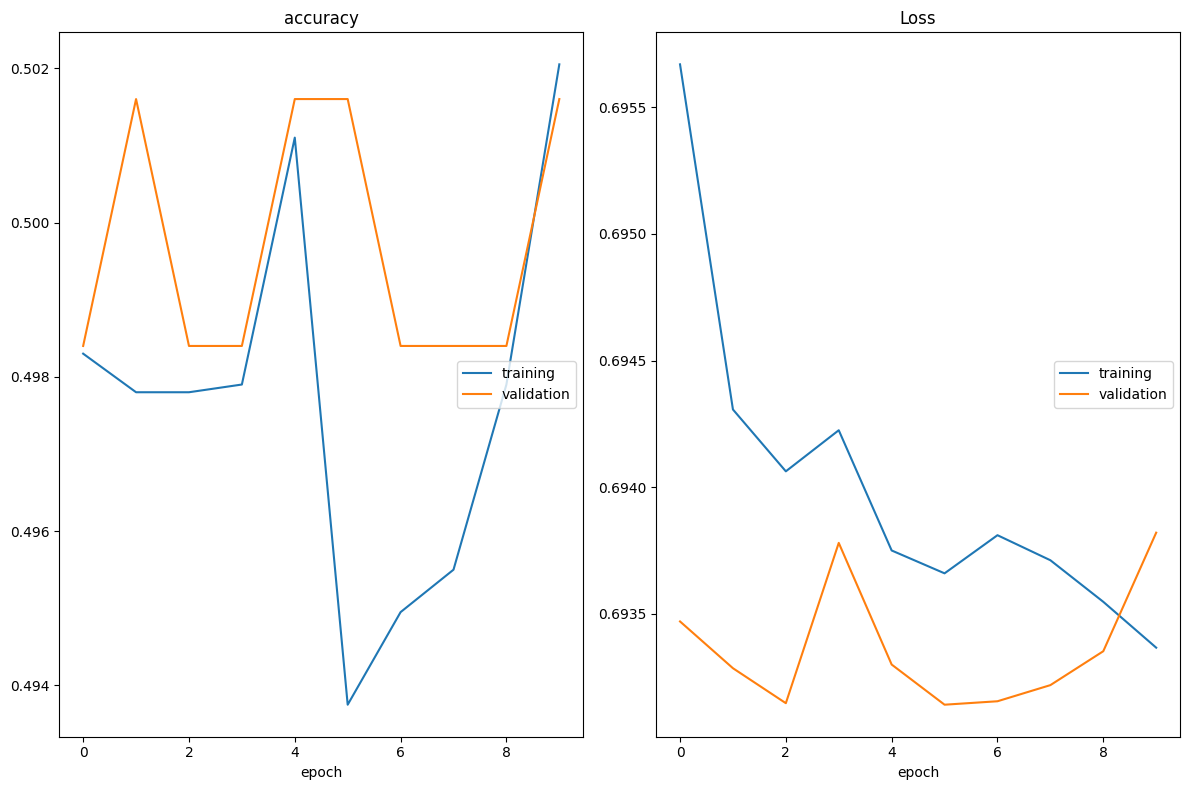

accuracy
	training         	 (min:    0.494, max:    0.502, cur:    0.502)
	validation       	 (min:    0.498, max:    0.502, cur:    0.502)
Loss
	training         	 (min:    0.693, max:    0.696, cur:    0.693)
	validation       	 (min:    0.693, max:    0.694, cur:    0.694)
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 304ms/step - accuracy: 0.5000 - loss: 0.6934 - val_accuracy: 0.5016 - val_loss: 0.6938


In [ ]:
#compile the model
model.compile(optimizer= 'adam',
              loss= 'binary_crossentropy',
              metrics= ['accuracy'])

#fit the model
model.fit(
    X_train_padded, y_train,
    batch_size= 128,
    epochs= 10,
    validation_split= 0.2,
    callbacks= [plot_losses]
)

#Conclusion about the model
* ## Accuracy
    ### Training: 0.502 (Max: 0.502)
    ### Validation: 0.502 (Max: 0.502)

* ## Loss
    ### Training: 0.693 (Min: 0.693)
    ### Validation: 0.694 (Min: 0.693)




## 1.  Accuracy is very low (~50%), which is close to random guessing (50%).

## 2.   Loss remains around 0.693, indicating that the model is not learning effectively.

## 3. The model may be stuck due to vanishing gradients, poor feature extraction, or lack of sufficient complexity in the architecture.



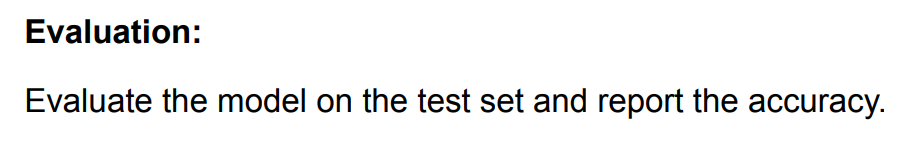

In [ ]:
test_loss, test_acc= model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.5008 - loss: 0.6939
Test Accuracy 0.5000


##The test accuracy  is 0.5000

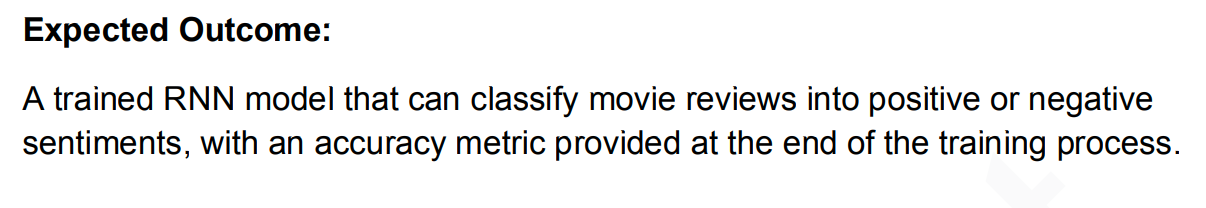